# EDA and Preprocessing

In [3]:
import pandas as pd
import numpy as np
import re 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px
import datetime
from matplotlib.pyplot import *

## 1. Dataset Preprocessing of Missing Values

In [4]:
sns.set(color_codes = True)

df = pd.read_csv('politifact_data.csv')
df['Year'] = pd.to_datetime(df['Date'])
df['Year'] = pd.DatetimeIndex(df['Year']).year
df.head()

,Quote,Source,Date,Post Author,Link,Label,Year
0,No U.S. presidents elected before Donald Trump...,Joe Biden,"July 27, 2020",Sophie Austin,https://www.politifact.com/factchecks/2020/jul...,false,2020
1,The CDC said it “made a mistake” and reduced i...,Viral image,"July 27, 2020",Tom Kertscher,https://www.politifact.com/factchecks/2020/jul...,false,2020
2,"“Under the leadership of @WVGovernor Justice, ...",West Virginia Democratic Party,"July 27, 2020",Patrick Orsagos,https://www.politifact.com/factchecks/2020/jul...,half-true,2020
3,The Trump administration has had “zero unfulfi...,Sean Hannity,"July 27, 2020",Bill McCarthy,https://www.politifact.com/factchecks/2020/jul...,false,2020
4,"Quotes Tom Brady as saying, “If anyone on my t...",Tweets,"July 27, 2020",Samantha Putterman,https://www.politifact.com/factchecks/2020/jul...,pants-fire,2020


In [5]:
# Finding the null values
df.isnull().sum()

Quote           0
Source          0
Date            0
Post Author    20
Link            0
Label           0
Year            0
dtype: int64

In [6]:
# Dropping the missing values
df = df.dropna()

# Drop 'flip' values from 'Label column
flip = ['full-flop', 'half-flip', 'no-flip']
df_no_flip = df[~df['Label'].isin(flip)]

df_no_flip.isnull().sum()

Quote          0
Source         0
Date           0
Post Author    0
Link           0
Label          0
Year           0
dtype: int64

## 2. Top 15 Sources in Dataset by Frequency

### A. Dataframe of Top 15 Sources

In [7]:
# Top 15 sources from dataset by frequency
top_sources = df_no_flip['Source'].value_counts().head(15)
df_top_sources = top_sources.to_frame().reset_index()
df_top_sources.rename(columns={'Source':'Count'}, inplace=True)
df_top_sources.rename(columns={'index':'Source'}, inplace=True)
df_top_sources

,Source,Count
0,Donald Trump,816
1,Facebook posts,747
2,Bloggers,567
3,Barack Obama,521
4,Viral image,433
5,Hillary Clinton,224
6,Scott Walker,191
7,Bernie Sanders,169
8,Rick Perry,163
9,Rick Scott,159


### B. Bar Graph of Top 15 Sources

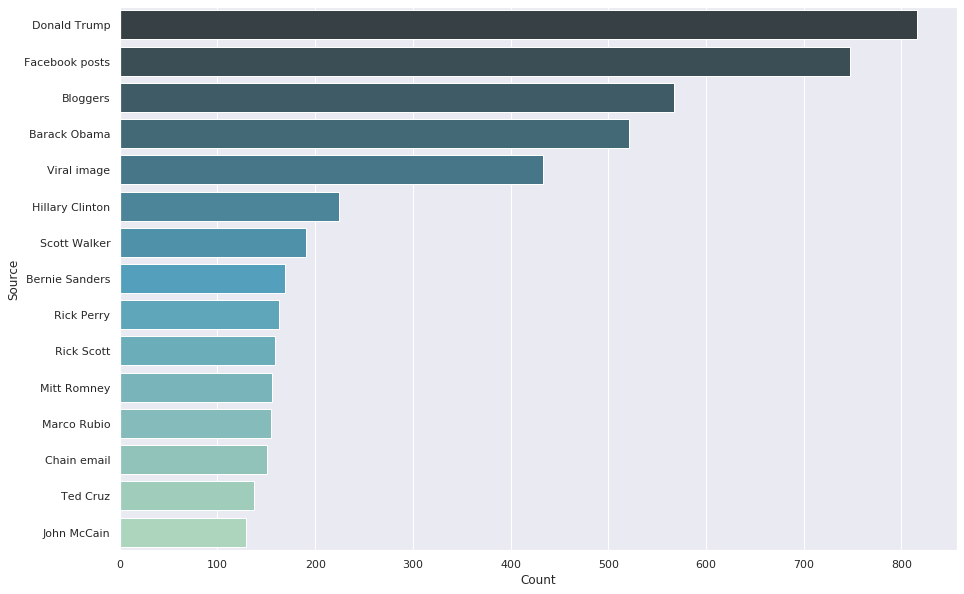

In [8]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Visualize the data
sns.set(style='whitegrid')
sns.barplot(ax=ax, x='Count', y='Source', data=df_top_sources, 
            palette='GnBu_d')

fig_top_sources = plt.show()
fig_top_sources

## 3. Entire Dataset Distribution by Label

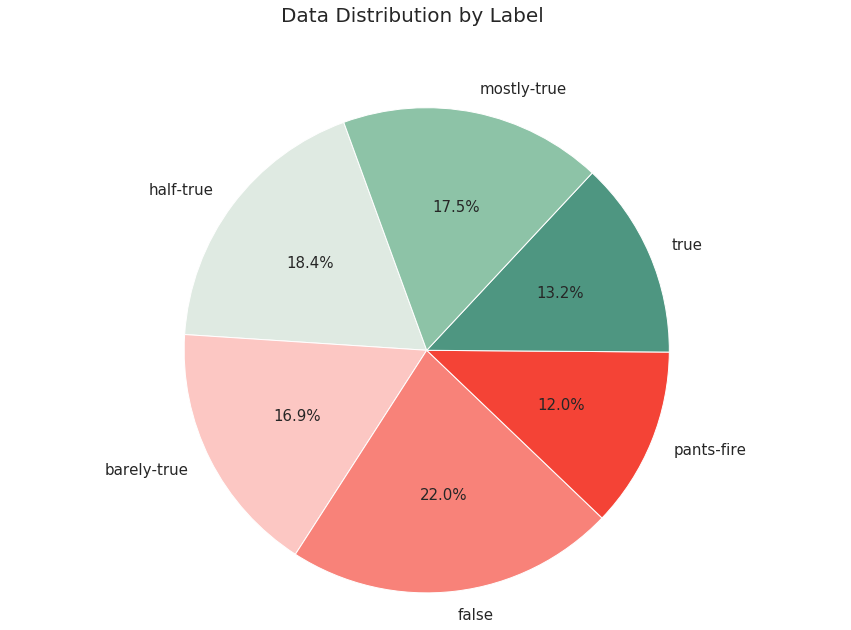

In [9]:
# PIE CHART BY 'LABEL' COLUMN

# Count by label
df_by_label = df_no_flip.groupby(['Label']).size().reset_index(name='Count')

# Reordering columns
df_by_label = df_by_label.reindex([2, 0, 1, 4, 5, 3])

# Initializing color scheme and font size
colors = ["#DFEAE2", "#FCC7C3", "#F88279", "#F44336", "#4E9681", "#8DC3A7"]
textprops = {"fontsize":15}


# Visualize the data
plt.figure(figsize=(15, 10))
plt.pie(df_by_label['Count'], labels=df_by_label['Label'],
        colors=colors, startangle=110, autopct='%1.1f%%', textprops=textprops)

plt.axis('equal')

plt.suptitle('Data Distribution by Label', fontsize=20)
plt.axis('equal')

plt.show()

## 4. Creating a Function for Labels by Source

In [10]:
def sourceLabelDist(source): 
    '''
    Creating a function for label distribution of any source, in the form of a 
    pie chart, taking source string as input.
    
    @param source: person or media outlet that claimed quote, as depicted by the 
    'Source' column in df_no_flip
    '''
    
    # Creates data subset of only 'Source' column = source
    df_source = df_no_flip[df_no_flip['Source'] == source] 
    print("Total Posts from " + source + ": " + str(len(df_source)))

    
    # Count by label
    source_by_label = df_source.groupby(['Label']).size().reset_index(name='Count')

    
    # Reorder columns - assumes ALL LABELS are present in df_source
    source_by_label = source_by_label.reindex([2, 0, 1, 4, 5, 3])


    # Initializing color scheme and font size
    colors = ["#DFEAE2", "#FCC7C3", "#F88279", "#F44336", "#4E9681", "#8DC3A7"]
    textprops = {"fontsize":15}


    # Visualize the data
    plt.figure(figsize=(15, 10))
    plt.pie(source_by_label['Count'], labels=source_by_label['Label'],
            colors=colors, startangle=110, autopct='%1.1f%%', textprops=textprops)

    
    plt.suptitle(source + ' Label Distribution', fontsize=20)
    plt.axis('equal')

    
    plt.show()

## 5. Political Figures Label Distribution 

### A. Donald Trump 

Total Posts from Donald Trump: 816


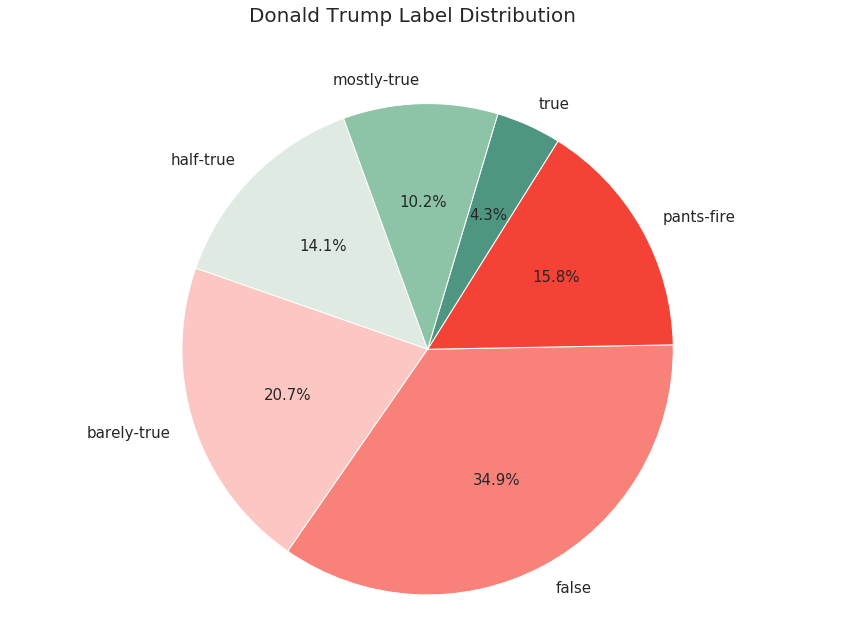

In [11]:
sourceLabelDist('Donald Trump')

### B. Barack Obama

Total Posts from Barack Obama: 521


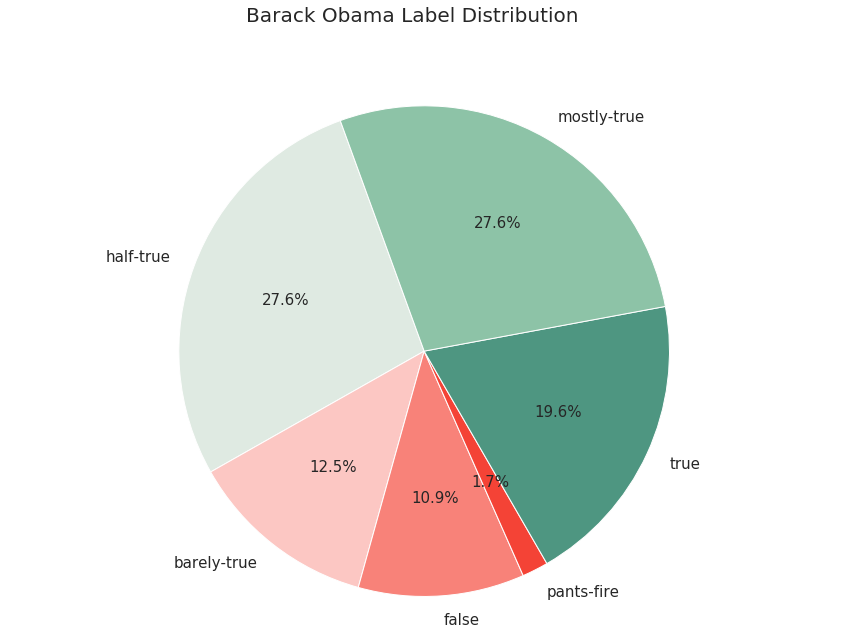

In [12]:
sourceLabelDist('Barack Obama')

### C. Hillary Clinton

Total Posts from Hillary Clinton: 224


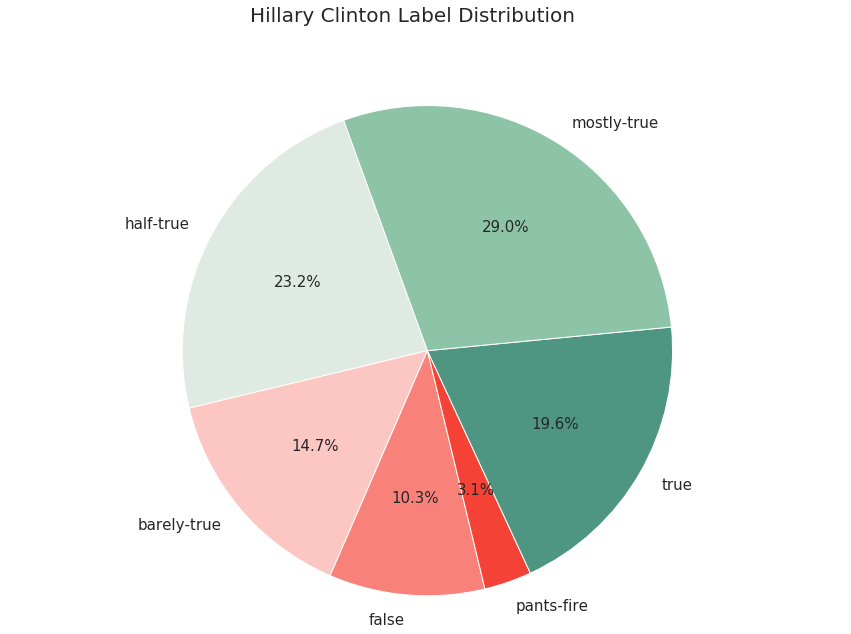

In [13]:
sourceLabelDist('Hillary Clinton')

### D. Joe Biden

Total Posts from Joe Biden: 108


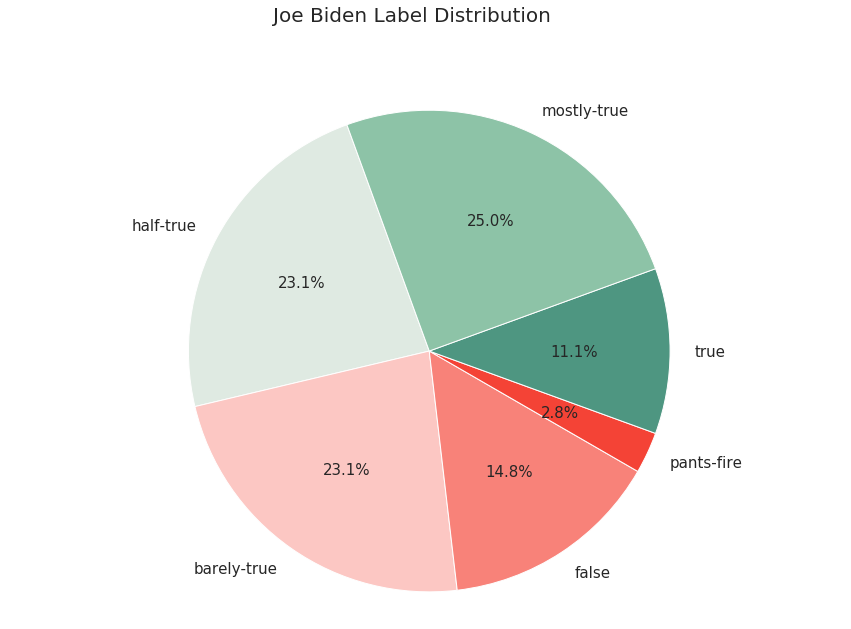

In [14]:
sourceLabelDist('Joe Biden')

### E. Bernie Sanders

Total Posts from Bernie Sanders: 169


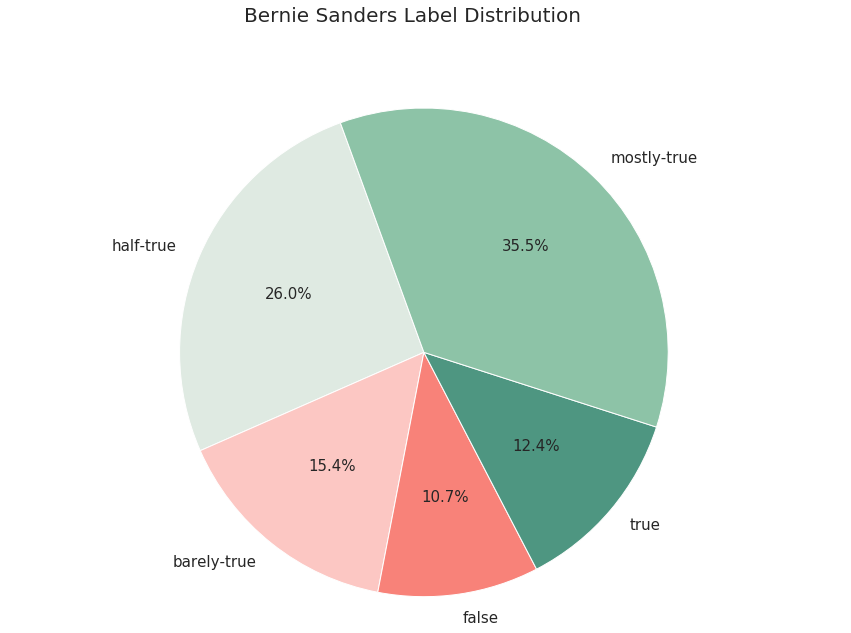

In [15]:
# Hard-coding because no 'pants-fire' claims from Bernie Sanders

df_bernie = df_no_flip[df_no_flip['Source'] == 'Bernie Sanders'] 
print("Total Posts from Bernie Sanders: " + str(len(df_bernie)))

    
# Count by label
bernie_by_label = df_bernie.groupby(['Label']).size().reset_index(name='Count')

    
# Reorder columns
bernie_by_label = bernie_by_label.reindex([2, 0, 1, 4, 3])


# Initializing color scheme and font size
colors = ["#DFEAE2", "#FCC7C3", "#F88279", "#4E9681", "#8DC3A7"]
textprops = {"fontsize":15}


# Visualize the data
plt.figure(figsize=(15, 10))
plt.pie(bernie_by_label['Count'], labels=bernie_by_label['Label'],
        colors=colors, startangle=110, autopct='%1.1f%%', textprops=textprops)

    
plt.suptitle('Bernie Sanders Label Distribution', fontsize=20)
plt.axis('equal')

    
plt.show()

### E. Mitt Romney

Total Posts from Mitt Romney: 156


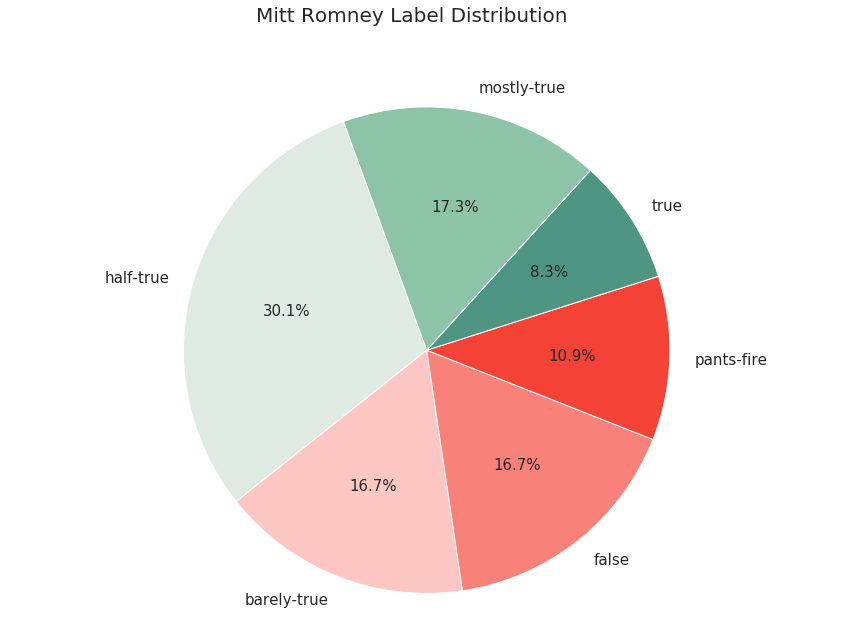

In [16]:
sourceLabelDist('Mitt Romney')

### F. Marco Rubio

Total Posts from Marco Rubio: 155


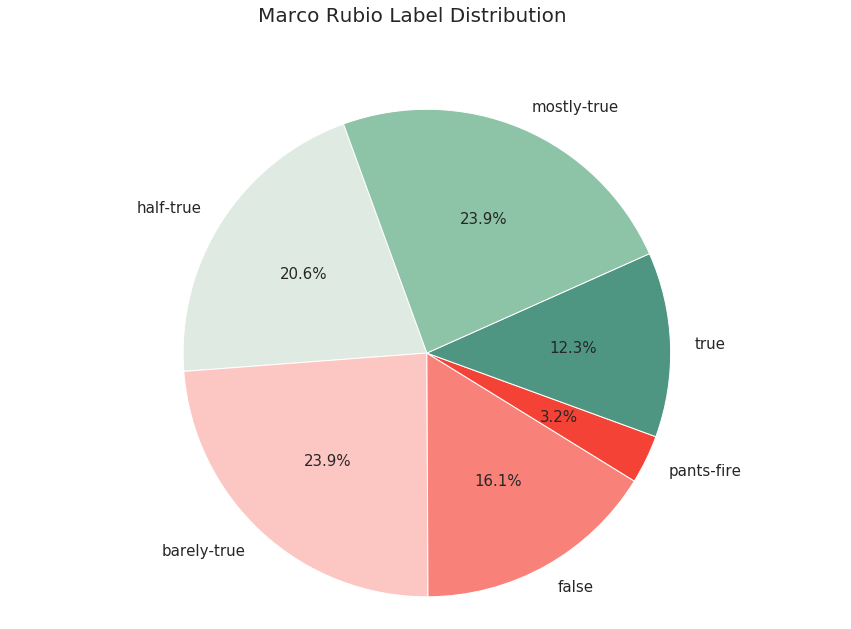

In [17]:
sourceLabelDist('Marco Rubio')

### G. John McCain

Total Posts from John McCain: 129


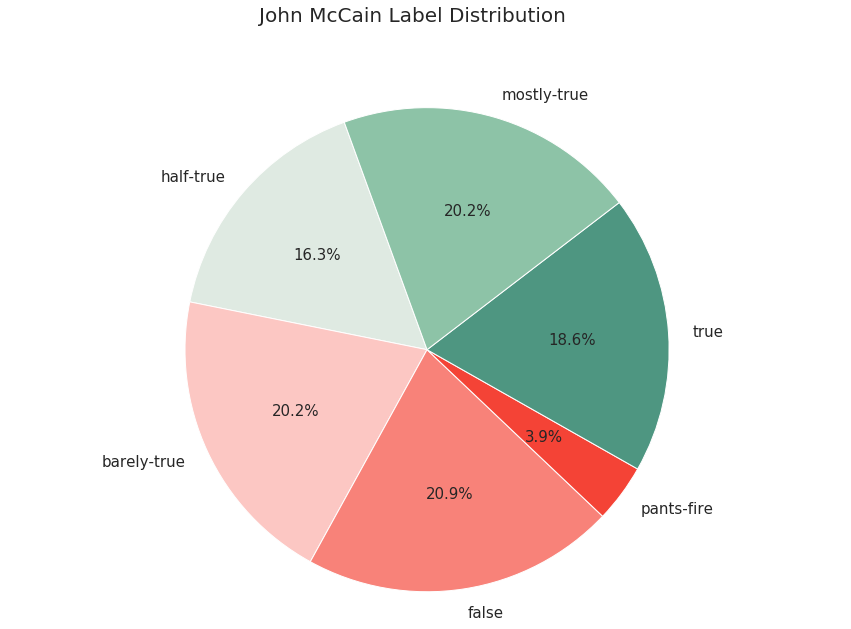

In [18]:
sourceLabelDist('John McCain')

## 6. Media Sources Label Distribution

### A. Facebook

Total Posts from Facebook posts: 747


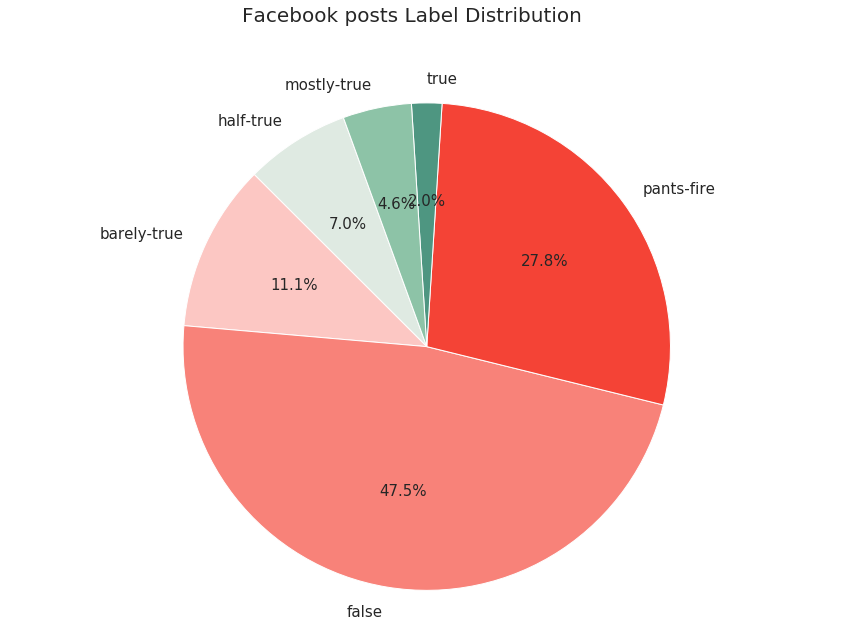

In [19]:
sourceLabelDist('Facebook posts')

### B. Bloggers

Total Posts from Bloggers: 567


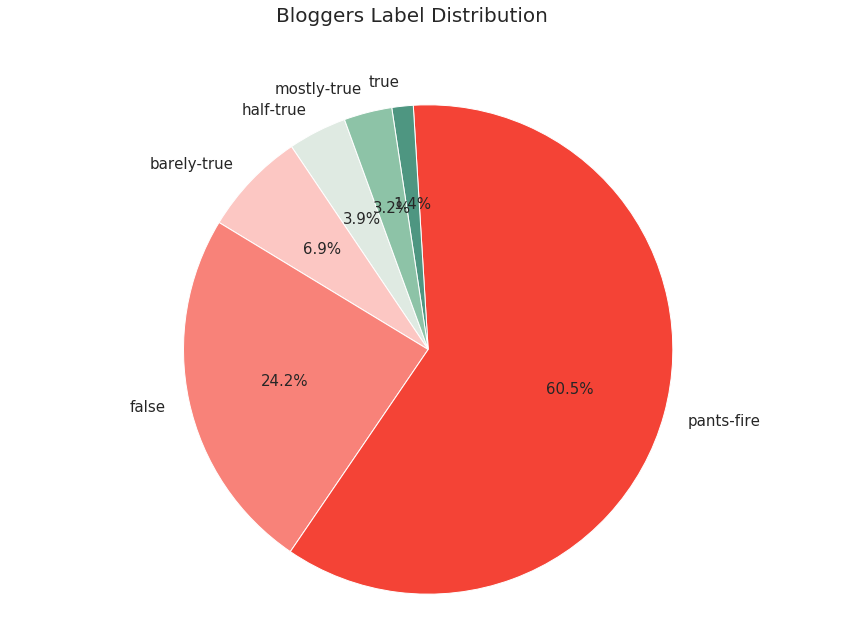

In [20]:
sourceLabelDist('Bloggers')

### C. Tweets 

Total Posts from Tweets: 31


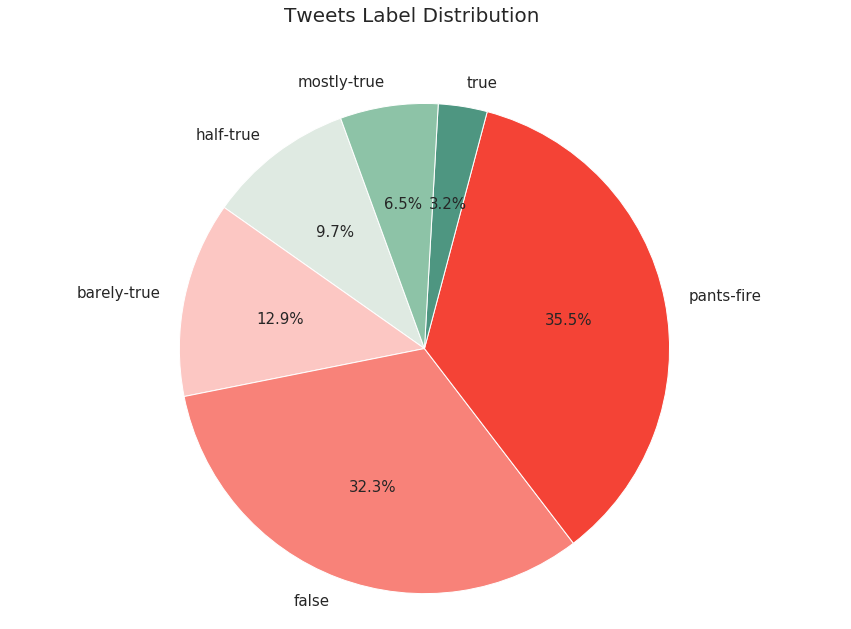

In [21]:
sourceLabelDist('Tweets')

### D. Viral Images

Total Posts from Viral image: 433


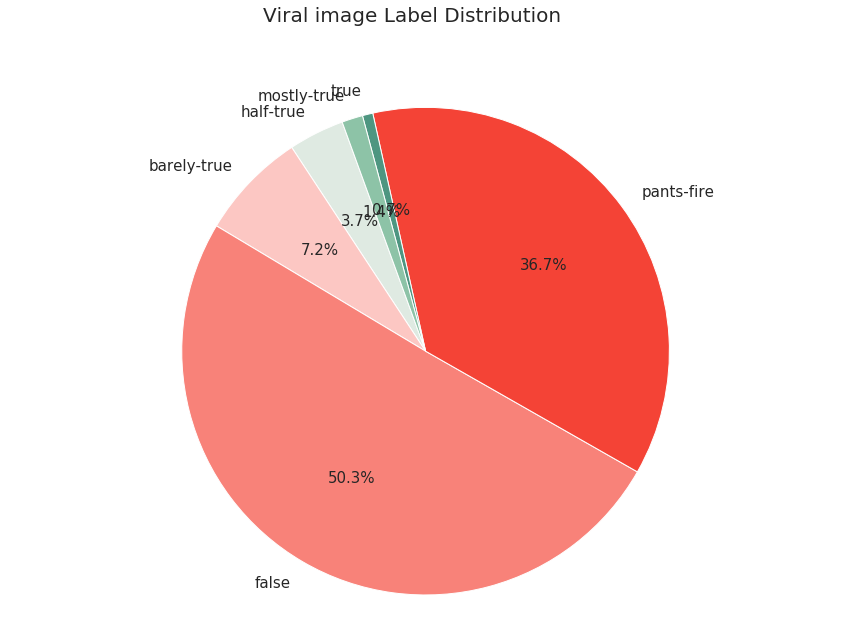

In [22]:
sourceLabelDist('Viral image')

### E. Chain Emails

Total Posts from Chain email: 151


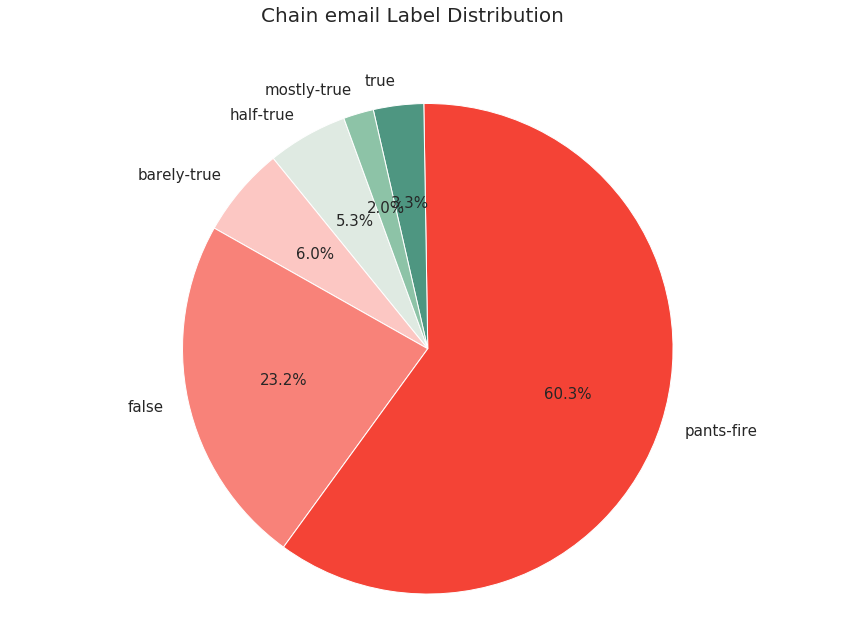

In [23]:
sourceLabelDist('Chain email')

## 7. Distribution of Posts in Dataset by Year  

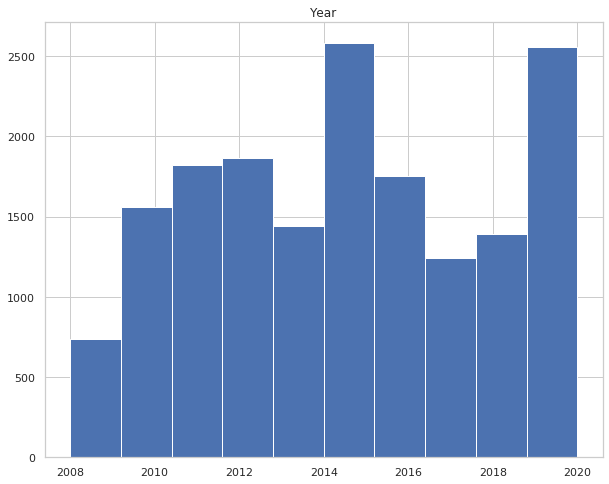

In [24]:
df.hist(['Year'], figsize=(10, 8))
plt.show()

## 8. Percent of Posts of each Category by Year (6 Category) 

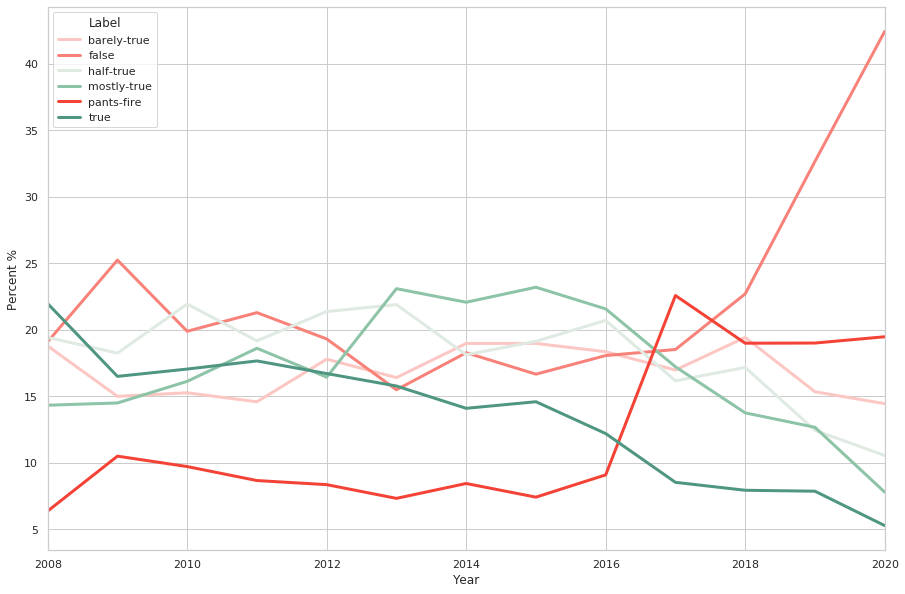

In [25]:
grouped = df_no_flip.groupby(['Year', 'Label']).count()
df_year_post = grouped.groupby('Year').sum()
plot_df = grouped['Percent %'] = round((100*grouped['Quote'] / df_year_post['Quote']), 3)
plot_df = plot_df.unstack().plot(figsize=(15, 10), linewidth=3, color=["#FCC7C3", "#F88279", "#DFEAE2", "#8DC3A7", "#F44336", "#4E9681"]).set_ylabel('Percent %')
plt.show()

## 9. Simplifying Data into 3 Labels

In [26]:
# Simplifying 'Label' column into 3 labels: 'true', 'false', and 'biased' 

# Create a copy of df_no_flip called 'df_3_labels'
df_3_labels = df_no_flip.copy(deep=True)

# 'Change'mostly-true' to 'true', 'pants-fire' to 'false, 'barely-true' and 'half-true' to 'biased'
df_3_labels['Label'] = df_3_labels['Label'].replace(['mostly-true','pants-fire','barely-true','half-true'],
                                              ['true','false','biased','biased'])

# Check that final_df only has 3 labels
df_3_labels_count = df_3_labels.groupby(['Label']).size().reset_index(name='Count')
df_3_labels_count

,Label,Count
0,biased,5905
1,false,5679
2,true,5125


## 10. Percentage of Posts of each Category by Year (3 Category) 

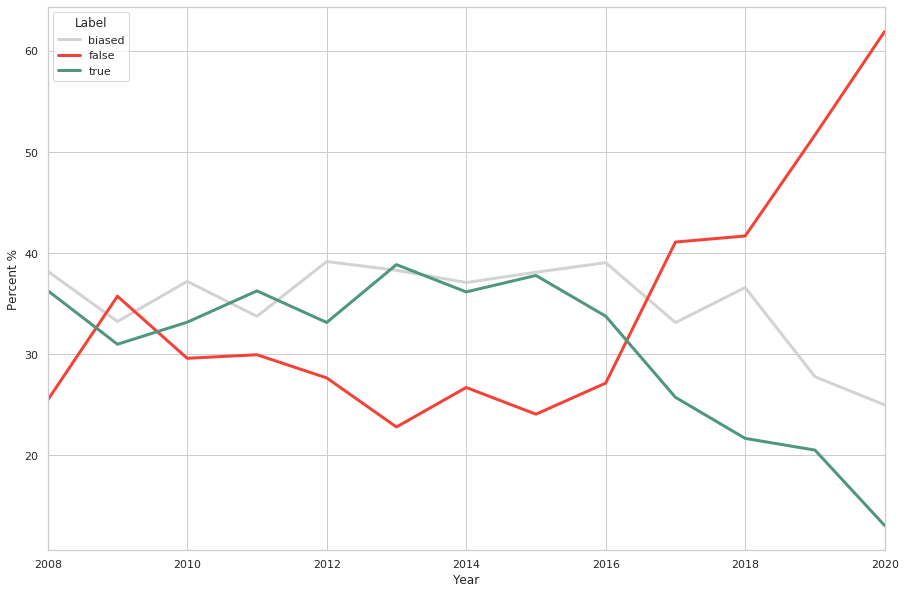

In [27]:
grouped = df_3_labels.groupby(['Year', 'Label']).count()
df_year_post = grouped.groupby('Year').sum()
plot_df = grouped['Percent %'] = round((100*grouped['Quote'] / df_year_post['Quote']), 3)
plot_df.unstack().plot(figsize=(15, 10), linewidth=3, color=["#D3D3D3", "#F44336", "#4E9681"]).set_ylabel('Percent %')
plt.show()

## 11. Building an N-gram Model

In [28]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize # Tokenization - splitting a large sample of text into words
from nltk.stem import WordNetLemmatizer
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

# Stopwords - remove common words that do not contribute to meaning of text (i.e. 'the', 'a')
stop_words = stopwords.words('english')

# Lemmatization - process of grouping together the different forms of same root word (i.e. 'swimming' --> 'swim')
lemmatizer = WordNetLemmatizer()

# Create a copy of df_3_label called 'df_ngram'
df_ngram = df_3_labels.copy(deep=True)

# Lower-case every word in 'Quote' column
df_ngram['Quote'] = df_ngram['Quote'].apply(lambda x : x.lower())


for index, row in df_ngram.iterrows():

    filter_sentence = ''
    sentence = row['Quote']
    
    # Cleaning the sentence with regex
    sentence = re.sub(r'[^\w\s]', '', sentence)
    
    # Tokenization
    words = nltk.word_tokenize(sentence)   
    
    # Stopwords removal
    words = [w for w in words if not w in stop_words]
    
    # Lemmatization
    for word in words:
        filter_sentence = filter_sentence  + ' ' + str(lemmatizer.lemmatize(word))
           
    df_ngram.loc[index, 'Quote'] = filter_sentence
    
df_ngram = df_ngram[['Quote', 'Label']]

df_ngram.head()

,Quote,Label
0,u president elected donald trump racist,false
1,cdc said made mistake reduced count florida c...,false
2,leadership wvgovernor justice west virginia h...,biased
3,trump administration zero unfulfilled equipme...,false
4,quote tom brady saying anyone team kneel quit,false


### Merging ALL quotes of each label into a single string

In [29]:
merge_ngram = df_ngram.groupby('Label')['Quote'].apply(''.join).reset_index()
merge_ngram

,Label,Quote
0,biased,leadership wvgovernor justice west virginia h...
1,false,u president elected donald trump racist cdc s...
2,true,there already 10000 business likely open sign...


In [30]:
# Creating str variables of each label
biased_str = nltk.word_tokenize(merge_ngram['Quote'].values[0])
false_str = nltk.word_tokenize(merge_ngram['Quote'].values[1])
true_str = nltk.word_tokenize(merge_ngram['Quote'].values[2])

### Function for Top 25 N-grams by Frequency

In [31]:
def plot_ngram(freqdist):
    '''
    Creating a function that plots a bar graph for the top 25 n-grams by frequency, 
    taking in a freq dist as input
    
    @param freqdist: frequency distribution of n-gram, using nltk.FreqDist method on
    a tokenized word list
    '''
    
    # Convert freq dist into a pandas dataframe called 'df_freq'
    df_freq = pd.DataFrame(list(freqdist.items()), columns = ["Word","Frequency"])
    
    # Sort df_freq by 'Frequency' column, limit to top 25
    top_25 = df_freq.sort_values(by='Frequency',ascending=False).head(25).reset_index(drop=True)
    
    # Initialize the matplotlib figure
    f, ax = plt.subplots(figsize=(15, 10))

    # Visualize the data
    sns.set(style='whitegrid')
    sns.barplot(ax=ax, x='Frequency', y='Word', data=top_25, 
            palette='GnBu_d')

    plt.show()

### A. Unigram Frequency

#### Biased String

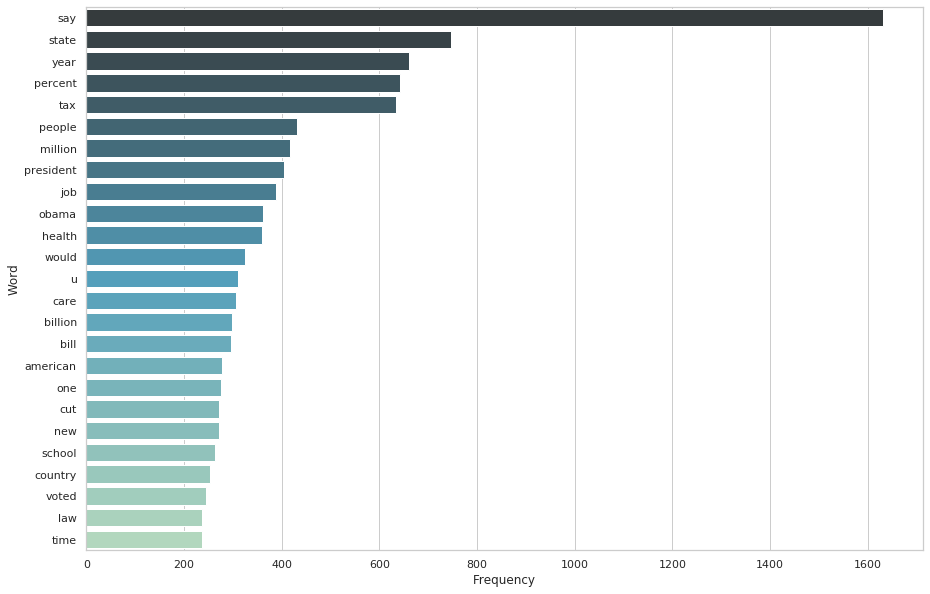

In [32]:
uni_biased = nltk.FreqDist(biased_str)
plot_ngram(uni_biased)

#### 'False' string

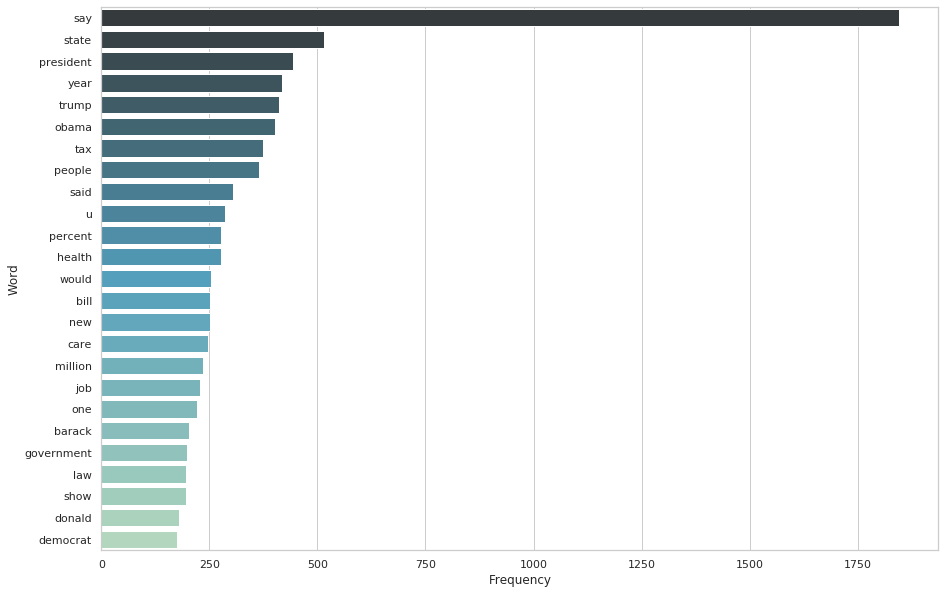

In [33]:
uni_false = nltk.FreqDist(false_str)
plot_ngram(uni_false)

#### 'True' string

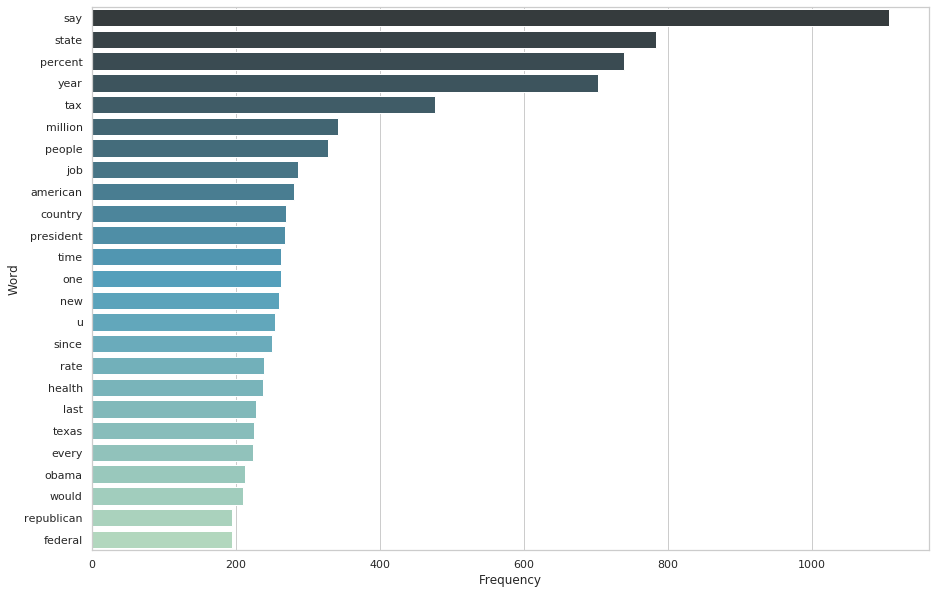

In [34]:
uni_true = nltk.FreqDist(true_str)
plot_ngram(uni_true)

### B. Bigram Frequency

#### 'Biased' string

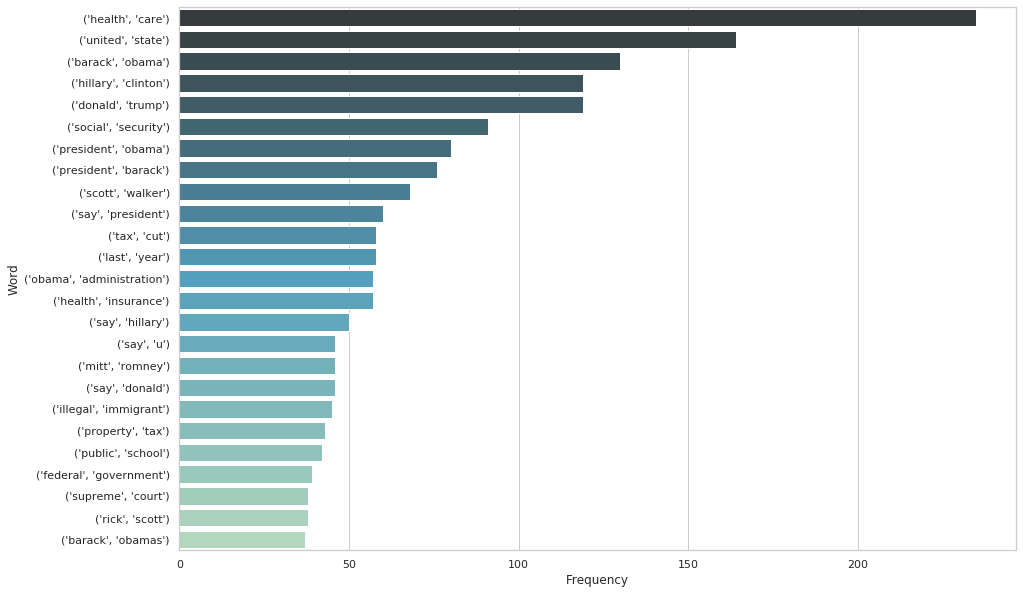

In [35]:
bi_biased = nltk.FreqDist(nltk.bigrams(biased_str))
plot_ngram(bi_biased)

#### 'False' string

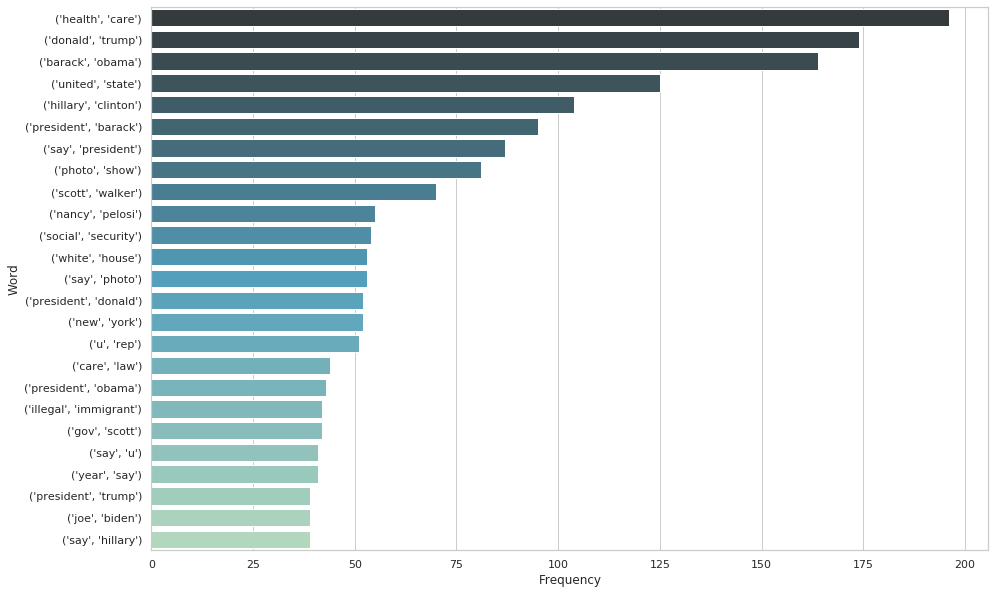

In [36]:
bi_false = nltk.FreqDist(nltk.bigrams(false_str))
plot_ngram(bi_false)

#### 'True' string

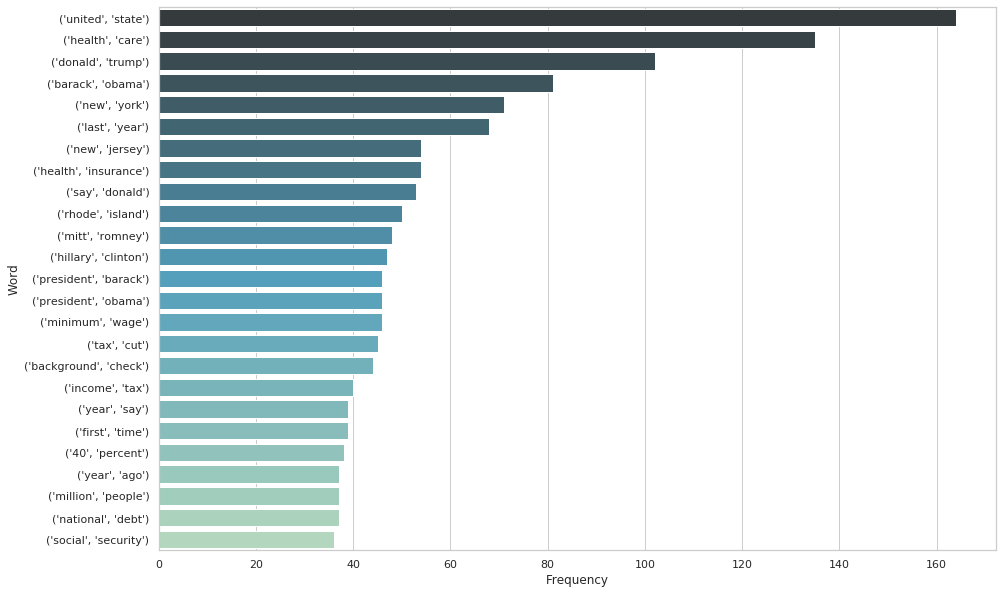

In [37]:
bi_true = nltk.FreqDist(nltk.bigrams(true_str))
plot_ngram(bi_true)

## 12. Sentiment Analysis

### Adding a 'Sentiment Score' based on 'Quote' column

In [38]:
from textblob import TextBlob

# Create a copy of df_3_labels called 'df_sentiment'
df_sentiment = df_3_labels.copy(deep=True)

# Add new column called 'Sentiment Score' based on 'Quote' column
df_sentiment['Sentiment Score'] = round(df_sentiment['Quote'].apply(lambda x: TextBlob(x).sentiment.polarity), 3)
df_sentiment.head(10)

,Quote,Source,Date,Post Author,Link,Label,Year,Sentiment Score
0,No U.S. presidents elected before Donald Trump...,Joe Biden,"July 27, 2020",Sophie Austin,https://www.politifact.com/factchecks/2020/jul...,false,2020,0.000
1,The CDC said it “made a mistake” and reduced i...,Viral image,"July 27, 2020",Tom Kertscher,https://www.politifact.com/factchecks/2020/jul...,false,2020,0.000
2,"“Under the leadership of @WVGovernor Justice, ...",West Virginia Democratic Party,"July 27, 2020",Patrick Orsagos,https://www.politifact.com/factchecks/2020/jul...,biased,2020,-0.125
3,The Trump administration has had “zero unfulfi...,Sean Hannity,"July 27, 2020",Bill McCarthy,https://www.politifact.com/factchecks/2020/jul...,false,2020,0.000
4,"Quotes Tom Brady as saying, “If anyone on my t...",Tweets,"July 27, 2020",Samantha Putterman,https://www.politifact.com/factchecks/2020/jul...,false,2020,0.000
5,Michigan House “passes bill to ‘voluntarily’ b...,Facebook posts,"July 27, 2020",Madison Czopek,https://www.politifact.com/factchecks/2020/jul...,biased,2020,0.000
6,Says Sen. Thom Tillis “doesn’t think restauran...,Majority Forward,"July 24, 2020",Paul Specht,https://www.politifact.com/factchecks/2020/jul...,false,2020,0.000
7,Says Gov. Gretchen Whitmer “defunded the Michi...,Great Lakes News,"July 24, 2020",Clara Hendrickson,https://www.politifact.com/factchecks/2020/jul...,false,2020,0.000
8,"There’s already 10,000 businesses that are not...",Joe Biden,"July 24, 2020",Samantha Putterman,https://www.politifact.com/factchecks/2020/jul...,true,2020,0.031
9,“We're setting record job numbers.”,Donald Trump,"July 24, 2020",Louis Jacobson,https://www.politifact.com/factchecks/2020/jul...,biased,2020,0.000


### Boxplot of 'Sentiment Score' for each label

         count      mean       std  min  25%  50%     75%  max
Label                                                         
biased  5905.0  0.053369  0.212998 -1.0  0.0  0.0  0.1360  1.0
false   5679.0  0.030783  0.214247 -1.0  0.0  0.0  0.0915  1.0
true    5125.0  0.056651  0.213786 -1.0  0.0  0.0  0.1360  1.0


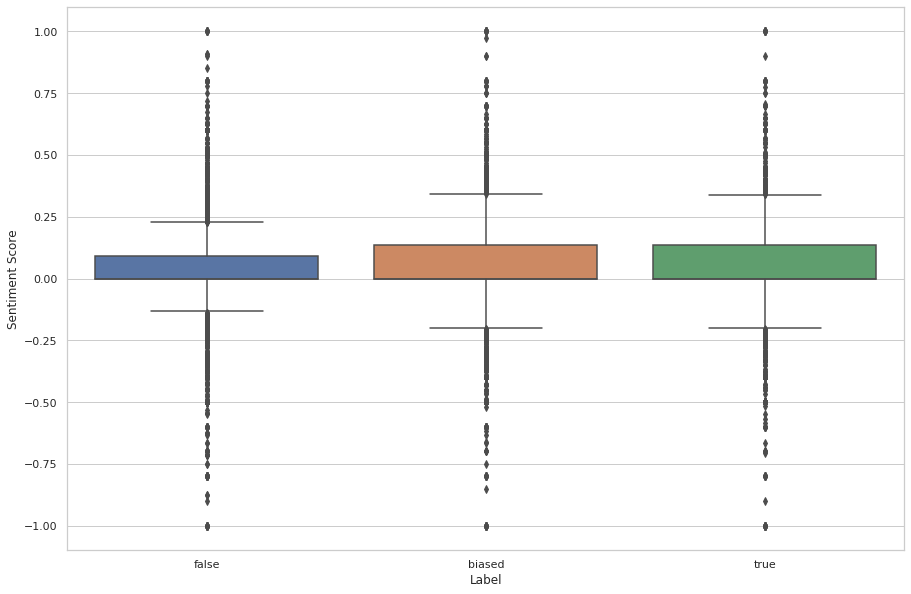

In [39]:
# Descriptive statistics
sentiment_group = df_sentiment.groupby('Label')['Sentiment Score'].describe()
print(sentiment_group)

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Visualize the data with a boxplot
sns.set(style="whitegrid")
sns.boxplot(x='Label', y='Sentiment Score', data=df_sentiment)
plt.show()

## 13. Word Count Distribution by Label

In [40]:
# Create a copy of df_3_labels called 'df_word_count'
df_word_count = df_3_labels.copy(deep=True)

# Add new column called 'Word Count' based on 'Quote' column
df_word_count['Word Count'] = df_word_count['Quote'].apply(lambda x: len(nltk.word_tokenize(x)))

### Function for 'Word Count' distribution by 'Label'

In [41]:
def plot_word_count_dist(label):
    '''
    Creating a function that plots a histogram for 'Word Count' column by 'Label' column, 
    taking label string as input.
    
    @param label: category of truth in 'Label' column in df_word_count
    '''
    
    
    # Create a subset of df_word_count for only 'Label' == label
    df_label = df_word_count[df_word_count['Label'] == label] 
    print(df_label['Word Count'].describe())

    # Visualize the data
    plt.figure(figsize=(15, 10))
    plt.hist(df_label['Word Count'], bins=15)
    plt.show()

#### 'Biased' label

count    5905.000000
mean       23.727858
std         9.685761
min         5.000000
25%        17.000000
50%        22.000000
75%        29.000000
max        81.000000
Name: Word Count, dtype: float64


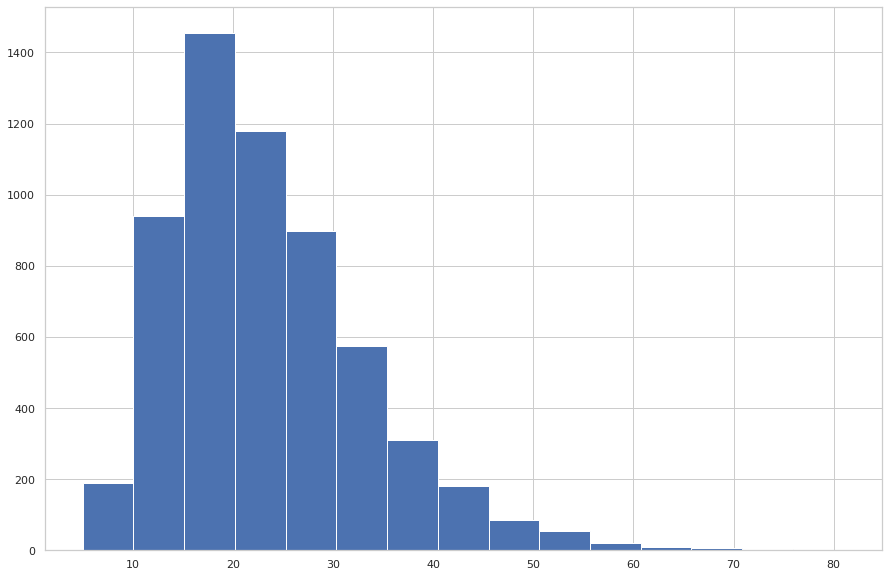

In [42]:
plot_word_count_dist('biased')

#### 'False' label

count    5679.000000
mean       21.579327
std         9.348541
min         6.000000
25%        15.000000
50%        19.000000
75%        26.000000
max        87.000000
Name: Word Count, dtype: float64


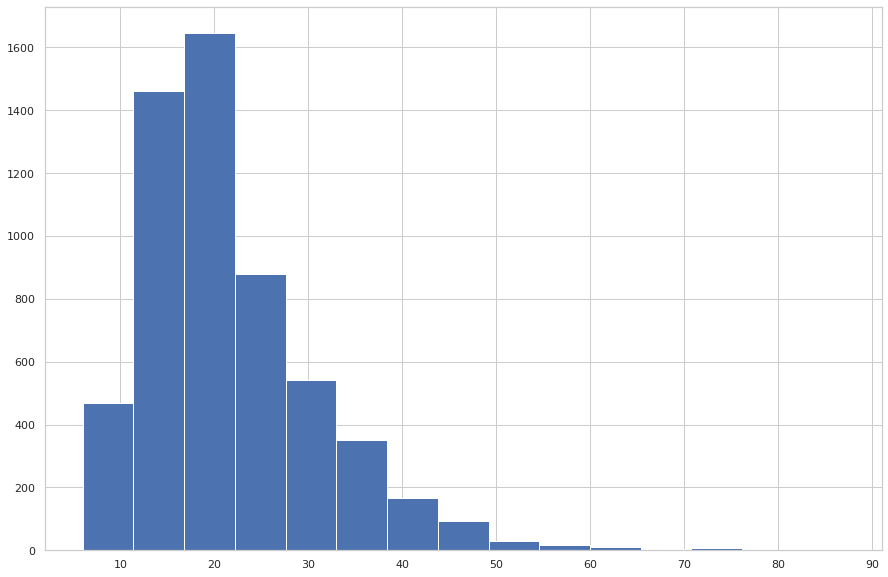

In [43]:
plot_word_count_dist('false')

#### 'True' label

count    5125.000000
mean       22.921756
std         9.033026
min         5.000000
25%        16.000000
50%        21.000000
75%        28.000000
max        87.000000
Name: Word Count, dtype: float64


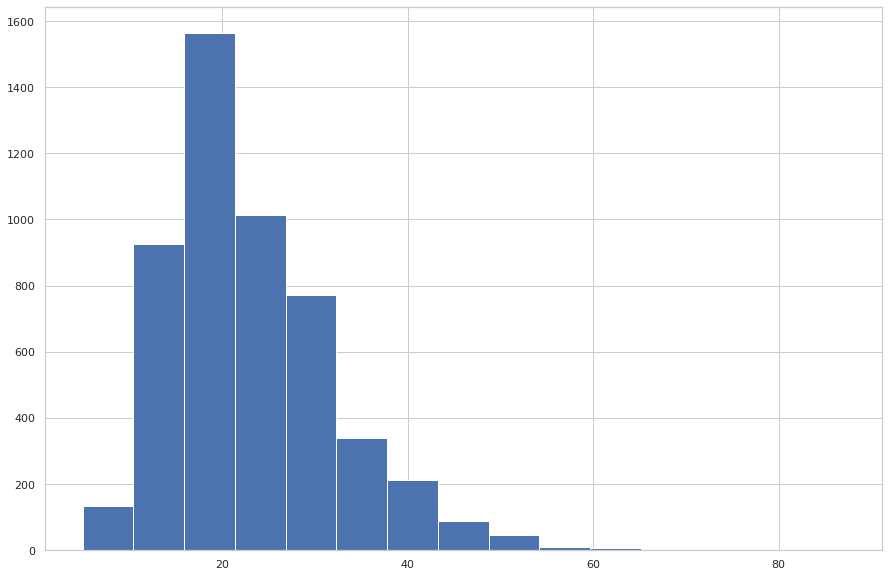

In [44]:
plot_word_count_dist('true')

In [48]:
def format_data(csv):
    
    df = pd.read_csv(csv)
    df['Year'] = pd.to_datetime(df['Date'])
    df['Year'] = pd.DatetimeIndex(df['Year']).year
    df = df.dropna()

    # Drop 'flip' values from 'Label column
    flip = ['full-flop', 'half-flip', 'no-flip']
    df = df[~df['Label'].isin(flip)]

    df['Label'] = df['Label'].replace(['mostly-true','pants-fire','barely-true','half-true'],
                                                  ['true','false','biased','biased'])
    
    
    # Convert to lowercases and remove punctuation
    df['Quote'] = df['Quote'].apply(lambda x : x.lower()).apply(lambda x : re.sub(r'[^\w\s]', '', x))

    return df

format_data('politifact_data.csv')

,Quote,Source,Date,Post Author,Link,Label,Year
0,no u.s. presidents elected before donald trump...,Joe Biden,"July 27, 2020",Sophie Austin,https://www.politifact.com/factchecks/2020/jul...,false,2020
1,the cdc said it “made a mistake” and reduced i...,Viral image,"July 27, 2020",Tom Kertscher,https://www.politifact.com/factchecks/2020/jul...,false,2020
2,"“under the leadership of @wvgovernor justice, ...",West Virginia Democratic Party,"July 27, 2020",Patrick Orsagos,https://www.politifact.com/factchecks/2020/jul...,biased,2020
3,the trump administration has had “zero unfulfi...,Sean Hannity,"July 27, 2020",Bill McCarthy,https://www.politifact.com/factchecks/2020/jul...,false,2020
4,"quotes tom brady as saying, “if anyone on my t...",Tweets,"July 27, 2020",Samantha Putterman,https://www.politifact.com/factchecks/2020/jul...,false,2020
5,michigan house “passes bill to ‘voluntarily’ b...,Facebook posts,"July 27, 2020",Madison Czopek,https://www.politifact.com/factchecks/2020/jul...,biased,2020
6,says sen. thom tillis “doesn’t think restauran...,Majority Forward,"July 24, 2020",Paul Specht,https://www.politifact.com/factchecks/2020/jul...,false,2020
7,says gov. gretchen whitmer “defunded the michi...,Great Lakes News,"July 24, 2020",Clara Hendrickson,https://www.politifact.com/factchecks/2020/jul...,false,2020
8,"there’s already 10,000 businesses that are not...",Joe Biden,"July 24, 2020",Samantha Putterman,https://www.politifact.com/factchecks/2020/jul...,true,2020
9,“we're setting record job numbers.”,Donald Trump,"July 24, 2020",Louis Jacobson,https://www.politifact.com/factchecks/2020/jul...,biased,2020


In [62]:
def format_data(csv):
    
    df = pd.read_csv(csv)
    df['Year'] = pd.to_datetime(df['Date'])
    df['Year'] = pd.DatetimeIndex(df['Year']).year
    df = df.dropna()

    # Drop 'flip' values from 'Label column
    flip = ['full-flop', 'half-flip', 'no-flip']
    df = df[~df['Label'].isin(flip)]

    df['Label'] = df['Label'].replace(['mostly-true','pants-fire','barely-true','half-true'],
                                                  ['true','false','biased','biased'])
    
        # Stopwords - remove common words that do not contribute to meaning of text (i.e. 'the', 'a')
    stop_words = stopwords.words('english')

    # Lemmatization - process of grouping together the different forms of same root word (i.e. 'swimming' --> 'swim')
    lemmatizer = WordNetLemmatizer()

    df['Quote'] = df['Quote'].apply(lambda x : x.lower()).apply(lambda x : re.sub(r'[^\w\s]', '', x))
    
    for index, row in df.iterrows():

        filter_sentence = ''
        sentence = row['Quote']

        # Cleaning the sentence with regex
        sentence = re.sub(r'[^\w\s]', '', sentence)

        # Tokenization
        words = nltk.word_tokenize(sentence)   

        # Stopwords removal
        words = [w for w in words if not w in stop_words]

        # Lemmatization
        for word in words:
            filter_sentence = filter_sentence  + ' ' + str(lemmatizer.lemmatize(word))

        df.loc[index, 'Quote'] = filter_sentence

    return df

In [63]:
format_data('politifact_data.csv')

,Quote,Source,Date,Post Author,Link,Label,Year
0,u president elected donald trump racist,Joe Biden,"July 27, 2020",Sophie Austin,https://www.politifact.com/factchecks/2020/jul...,false,2020
1,cdc said made mistake reduced count florida c...,Viral image,"July 27, 2020",Tom Kertscher,https://www.politifact.com/factchecks/2020/jul...,false,2020
2,leadership wvgovernor justice west virginia h...,West Virginia Democratic Party,"July 27, 2020",Patrick Orsagos,https://www.politifact.com/factchecks/2020/jul...,biased,2020
3,trump administration zero unfulfilled equipme...,Sean Hannity,"July 27, 2020",Bill McCarthy,https://www.politifact.com/factchecks/2020/jul...,false,2020
4,quote tom brady saying anyone team kneel quit,Tweets,"July 27, 2020",Samantha Putterman,https://www.politifact.com/factchecks/2020/jul...,false,2020
5,michigan house pass bill voluntarily begin pl...,Facebook posts,"July 27, 2020",Madison Czopek,https://www.politifact.com/factchecks/2020/jul...,biased,2020
6,say sen thom tillis doesnt think restaurant w...,Majority Forward,"July 24, 2020",Paul Specht,https://www.politifact.com/factchecks/2020/jul...,false,2020
7,say gov gretchen whitmer defunded michigan st...,Great Lakes News,"July 24, 2020",Clara Hendrickson,https://www.politifact.com/factchecks/2020/jul...,false,2020
8,there already 10000 business likely open sign...,Joe Biden,"July 24, 2020",Samantha Putterman,https://www.politifact.com/factchecks/2020/jul...,true,2020
9,setting record job number,Donald Trump,"July 24, 2020",Louis Jacobson,https://www.politifact.com/factchecks/2020/jul...,biased,2020
